In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [8]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 430.4 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/10.7 MB 589.1 kB/s eta 0:00:17
   --- ------------------------------------ 1.0/10.7 MB 729.5 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/10.7 MB 729.5 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/10.7 MB 671.3 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/10.7 MB 671.3 kB/s eta 0:00:15
   ----- ---------------------------------- 1.6/10.7 MB 666.0 kB/s eta 0:00:14
   ------ --------------------------------- 1.8/10.7 MB 704.1 kB/s eta 0:00:13
   ------- -------

In [14]:
np.random.seed(52)
n_sample = 500
X = np.random.uniform(1, 10, n_sample)
noise = np.random.normal(0, 5, n_sample)
y  = 10 * X + noise
df = pd.DataFrame({'hours_studing': X, 'score': y})
df.head()

,hours_studing,score
0,8.407993,84.684474
1,1.235062,14.339945
2,2.896936,30.392906
3,6.565796,73.803476
4,1.884560,11.465843


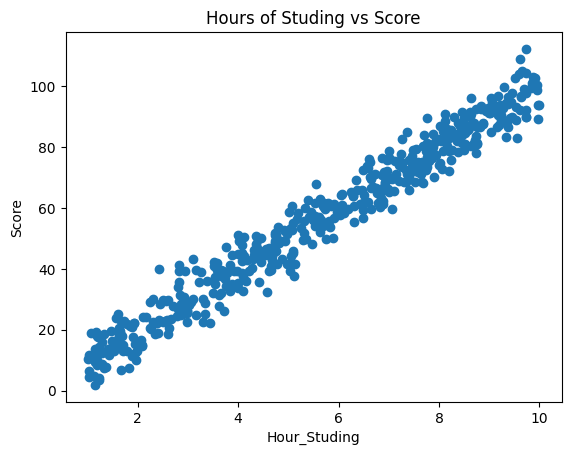

,hours_studing,score
hours_studing,1.000000,0.981149
score,0.981149,1.000000


In [15]:
plt.scatter(df['hours_studing'], df['score'])
plt.title('Hours of Studing vs. Score')
plt.xlabel('Hour_Studing')
plt.ylabel('Score')
plt.show()
df.corr()

In [24]:
X = df[['hours_studing']]
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred_train = lr.predict(X_train_scale)
y_pred_test = lr.predict(X_test_scale)
print(f'MSE for trainig data= {mean_squared_error(y_train, y_pred_train)}, and r2_score= {r2_score(y_train, y_pred_train)}')
print(f'MSE for testing data= {mean_squared_error(y_test, y_pred_test)}, and r2_score= {r2_score(y_test, y_pred_test)}')

MSE for trainig data= 24.687868035770563, and r2_score= 0.9646905910090008
MSE for testing data= 31.61542519196116, and r2_score= 0.9537315718801641


In [25]:
joblib.dump(lr, 'linear_regression_model.pk1')
joblib.dump(scaler, 'scaler.pk1')

['scaler.pk1']

In [36]:
x_future = np.random.uniform(1, 20, 6)
noise = np.random.normal(0, 3, 6)
y = 10 * x_future + noise
df_ = pd.DataFrame({'hours_studing':x_future, 'score':y})
X_future = df_[['hours_studing']]
y = df_['score']

model = joblib.load('linear_regression_model.pk1')
scaler = joblib.load('scaler.pk1')

X_future_scaled = scaler.transform(X_future)
y_pred= model.predict(X_future_scaled) 
print(f'MSE= {mean_squared_error(y, y_pred)}')

MSE= 8.959740893852528
